### IMDB Dataset Classifier: ML Algorithms

#### Load Dependencies

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%%capture
!pip install nltk

In [3]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk import pos_tag, word_tokenize
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import tensorflow as tf
import pandas as pd
import numpy as np

### Data Exploration

In [5]:
df = pd.read_csv("/content/drive/MyDrive/IMDB Dataset.csv")

In [6]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [7]:
df.groupby('sentiment').count()

,review
sentiment,
negative,25000
positive,25000


The dataset is balanced with 25K each of positive and negative reviews

### Data Pre-Processing

In [8]:
# Change lower case

def ChangeLower(msg):
    # converting messages to lowercase
    msg = msg.lower()
    return msg

df['review']=df['review'].apply(ChangeLower)

In [9]:
df['review'].head()

0    one of the other reviewers has mentioned that ...
1    a wonderful little production. <br /><br />the...
2    i thought this was a wonderful way to spend ti...
3    basically there's a family where a little boy ...
4    petter mattei's "love in the time of money" is...
Name: review, dtype: object

#### Remove Stop Words

In [10]:
stopwords = set(stopwords.words('english'))

In [11]:
def RemoveStop (msg):
    msg = [word for word in msg.split() if word not in stopwords]
    return msg

df['review']=df['review'].apply(RemoveStop)

In [12]:
df['review'].head()

0    [one, reviewers, mentioned, watching, 1, oz, e...
1    [wonderful, little, production., <br, /><br, /...
2    [thought, wonderful, way, spend, time, hot, su...
3    [basically, there's, family, little, boy, (jak...
4    [petter, mattei's, "love, time, money", visual...
Name: review, dtype: object

### Check for Most Common Words & Remove if not Meaningful

In [13]:
from collections import Counter
df['review']=df['review'].apply(lambda a: ' '.join(a))
Counter(" ".join(df["review"]).split()).most_common(100)

[('/><br', 100974),
 ('movie', 61492),
 ('film', 55086),
 ('one', 44983),
 ('like', 37281),
 ('would', 23807),
 ('even', 23681),
 ('good', 23467),
 ('really', 21805),
 ('see', 20901),
 ('-', 18201),
 ('get', 17689),
 ('much', 17278),
 ('story', 16810),
 ('also', 15743),
 ('time', 15657),
 ('great', 15465),
 ('first', 15455),
 ('make', 15028),
 ('people', 15028),
 ('could', 14927),
 ('/>the', 14702),
 ('made', 13562),
 ('bad', 13494),
 ('think', 13304),
 ('many', 12877),
 ('never', 12621),
 ('two', 12189),
 ('<br', 12028),
 ('little', 11827),
 ('well', 11692),
 ('watch', 11461),
 ('way', 11375),
 ('it.', 11169),
 ('know', 10784),
 ('movie.', 10764),
 ('love', 10748),
 ('best', 10743),
 ('seen', 10611),
 ('characters', 10599),
 ('character', 10386),
 ('movies', 10349),
 ('ever', 10218),
 ('still', 9778),
 ('films', 9578),
 ('plot', 9455),
 ('acting', 9378),
 ('show', 9376),
 ('better', 9045),
 ('film.', 8921),
 ('say', 8824),
 ('go', 8798),
 ('something', 8764),
 ("i'm", 8262),
 ('scene'

In [14]:
morewords ={"i've",'&','/>i',"i'm",'it.','<br','two','/>the','-','one','film','movie','/><br'}

In [15]:
stopwords.update(morewords)

In [16]:
df.head()

,review,sentiment
0,one reviewers mentioned watching 1 oz episode ...,positive
1,wonderful little production. <br /><br />the f...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically there's family little boy (jake) thi...,negative
4,"petter mattei's ""love time money"" visually stu...",positive


In [17]:
def RemoveStop (msg):
    msg = [word for word in msg.split() if word not in stopwords]
    return msg

df['review']=df['review'].apply(RemoveStop)

#### Carry out a second scan of most common words & remove

In [18]:
df['review']=df['review'].apply(lambda a: ' '.join(a))
Counter(" ".join(df["review"]).split()).most_common(100)

[('like', 37281),
 ('would', 23807),
 ('even', 23681),
 ('good', 23467),
 ('really', 21805),
 ('see', 20901),
 ('get', 17689),
 ('much', 17278),
 ('story', 16810),
 ('also', 15743),
 ('time', 15657),
 ('great', 15465),
 ('first', 15455),
 ('make', 15028),
 ('people', 15028),
 ('could', 14927),
 ('made', 13562),
 ('bad', 13494),
 ('think', 13304),
 ('many', 12877),
 ('never', 12621),
 ('little', 11827),
 ('well', 11692),
 ('watch', 11461),
 ('way', 11375),
 ('know', 10784),
 ('movie.', 10764),
 ('love', 10748),
 ('best', 10743),
 ('seen', 10611),
 ('characters', 10599),
 ('character', 10386),
 ('movies', 10349),
 ('ever', 10218),
 ('still', 9778),
 ('films', 9578),
 ('plot', 9455),
 ('acting', 9378),
 ('show', 9376),
 ('better', 9045),
 ('film.', 8921),
 ('say', 8824),
 ('go', 8798),
 ('something', 8764),
 ('scene', 8235),
 ('makes', 8222),
 ('watching', 8146),
 ('film,', 8120),
 ('real', 8041),
 ('movie,', 8040),
 ('find', 8002),
 ('back', 7904),
 ('actually', 7798),
 ('scenes', 7797),

In [19]:
morewords={"there's",'it,''things','may',"can't",'seems','quite','thing','movie,','film,','something','film.','movies','character','characters','movie.','would'}

In [20]:
stopwords.update(morewords)

In [21]:
def RemoveStop (msg):
    msg = [word for word in msg.split() if word not in stopwords]
    return msg

df['review']=df['review'].apply(RemoveStop)

#### Final scan of most common words

In [22]:
df['review']=df['review'].apply(lambda a: ' '.join(a))
Counter(" ".join(df["review"]).split()).most_common(100)

[('like', 37281),
 ('even', 23681),
 ('good', 23467),
 ('really', 21805),
 ('see', 20901),
 ('get', 17689),
 ('much', 17278),
 ('story', 16810),
 ('also', 15743),
 ('time', 15657),
 ('great', 15465),
 ('first', 15455),
 ('make', 15028),
 ('people', 15028),
 ('could', 14927),
 ('made', 13562),
 ('bad', 13494),
 ('think', 13304),
 ('many', 12877),
 ('never', 12621),
 ('little', 11827),
 ('well', 11692),
 ('watch', 11461),
 ('way', 11375),
 ('know', 10784),
 ('love', 10748),
 ('best', 10743),
 ('seen', 10611),
 ('ever', 10218),
 ('still', 9778),
 ('films', 9578),
 ('plot', 9455),
 ('acting', 9378),
 ('show', 9376),
 ('better', 9045),
 ('say', 8824),
 ('go', 8798),
 ('scene', 8235),
 ('makes', 8222),
 ('watching', 8146),
 ('real', 8041),
 ('find', 8002),
 ('back', 7904),
 ('actually', 7798),
 ('scenes', 7797),
 ('every', 7791),
 ('going', 7659),
 ('man', 7659),
 ('life', 7570),
 ('new', 7502),
 ('nothing', 7417),
 ('look', 7409),
 ('another', 7379),
 ('lot', 7356),
 ('want', 7048),
 ('end'

#### Final Scan of Data before next stage

In [23]:
df.head()

,review,sentiment
0,reviewers mentioned watching 1 oz episode hook...,positive
1,wonderful little production. filming technique...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically family little boy (jake) thinks zomb...,negative
4,"petter mattei's ""love time money"" visually stu...",positive


### Set up Data

In [24]:
X_train_raw, X_test_raw, y_train, y_test = train_test_split(df['review'], df['sentiment'], test_size=0.2, random_state = 42)

In [25]:
### STEP 2 - Declare Features Vectors to use
### Create TfidfVectorizer.

vectorizer = TfidfVectorizer()

### STEP 3 - Fit and transform.
### Note there's no need to create TF-IDF vectors for y - labels

X_train = vectorizer.fit_transform(X_train_raw)

### Note vectorizer was fitted prior in X_train process
X_test = vectorizer.transform(X_test_raw)

### Training & Evaluation

#### 1. Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression

### STEP 4 - Prediction
### Create and run Classifier

classifier = LogisticRegression(random_state = 42)

### Fitting requires training TF_IDF vectors and labels
classifier.fit(X_train, y_train)

### X_test is the transformed test TF-IDF vectors
predictions = classifier.predict(X_test)

In [27]:
# testing against testing set

y_pred = classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test,y_pred))

[[4375  586]
 [ 437 4602]]
              precision    recall  f1-score   support

    negative       0.91      0.88      0.90      4961
    positive       0.89      0.91      0.90      5039

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



#### 2. Naive Bayes

In [28]:
from sklearn.naive_bayes import MultinomialNB

### STEP 4 - Prediction
### Create and run Classifier

classifierNB = MultinomialNB()

### Fitting requires training TF_IDF vectors and labels
classifierNB.fit(X_train, y_train)

### X_test is the transformed test TF-IDF vectors
predictions = classifierNB.predict(X_test)

In [29]:
y_pred = classifierNB.predict(X_test)
print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test,y_pred))

[[4380  581]
 [ 749 4290]]
              precision    recall  f1-score   support

    negative       0.85      0.88      0.87      4961
    positive       0.88      0.85      0.87      5039

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



#### 3. Support Vector Machine

In [30]:
from sklearn.svm import LinearSVC

### STEP 4 - Prediction
### Create and run Classifier

classifierSVC = LinearSVC(random_state = 42)

### Fitting requires training TF_IDF vectors and labels
classifierSVC.fit(X_train, y_train)

### X_test is the transformed test TF-IDF vectors
predictions = classifierSVC.predict(X_test)

In [31]:
y_pred = classifierSVC.predict(X_test)
print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test,y_pred))

[[4394  567]
 [ 476 4563]]
              precision    recall  f1-score   support

    negative       0.90      0.89      0.89      4961
    positive       0.89      0.91      0.90      5039

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



#### SVM gives the best results at 0.9 accuracy, precision & recall

**CNN**

In [32]:
import tensorflow
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding
from tensorflow.keras.layers import SpatialDropout1D, Conv1D, GlobalMaxPooling1D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import os

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.style.use('ggplot')

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import pandas as pd

In [33]:
# Model Train
epochs = 10
batch_size = 128

# vector-space embedding:
n_dim = 64
n_unique_words = 5000
max_review_length = 100
pad_type = trunc_type = 'pre'
drop_embed = 0.2

# CNN architecture:
n_conv = 256
k_conv = 3

# Dense layer architecture:
n_dense = 256
dropout = 0.2

In [34]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

random_seed = 42
np.random.seed(random_seed)
tf.random.set_seed(random_seed)

# Define tokenizer with desired parameters
tokenizer = Tokenizer(num_words=n_unique_words)

# Fit tokenizer on training data
tokenizer.fit_on_texts(X_train_raw)
# Tokenize the text data
X_train_seq = tokenizer.texts_to_sequences(X_train_raw)
X_test_seq = tokenizer.texts_to_sequences(X_test_raw)

# Pad sequences
x_train = pad_sequences(X_train_seq, maxlen=max_review_length, padding=pad_type, truncating=trunc_type, value=0)
x_test = pad_sequences(X_test_seq, maxlen=max_review_length, padding=pad_type, truncating=trunc_type, value=0)


In [35]:
random_seed = 42
np.random.seed(random_seed)
tf.random.set_seed(random_seed)

model = Sequential()
model.add(Embedding(n_unique_words, n_dim, input_length=max_review_length))
model.add(SpatialDropout1D(drop_embed))
model.add(Conv1D(n_conv, k_conv, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(n_dense, activation='relu'))
model.add(Dropout(dropout))
model.add(Dense(1, activation='sigmoid'))

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 64)           320000    
                                                                 
 spatial_dropout1d (Spatial  (None, 100, 64)           0         
 Dropout1D)                                                      
                                                                 
 conv1d (Conv1D)             (None, 98, 256)           49408     
                                                                 
 global_max_pooling1d (Glob  (None, 256)               0         
 alMaxPooling1D)                                                 
                                                                 
 dense (Dense)               (None, 256)               65792     
                                                                 
 dropout (Dropout)           (None, 256)               0

In [37]:
model.compile(loss='binary_crossentropy', optimizer='nadam', metrics=['accuracy'])

In [38]:
es = EarlyStopping(monitor='val_accuracy', mode='max', min_delta=0.01, patience=4, verbose=1, restore_best_weights=True)

In [39]:
from sklearn.preprocessing import LabelEncoder
random_seed = 42
np.random.seed(random_seed)
tf.random.set_seed(random_seed)

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform labels
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


In [40]:
model_log = model.fit(x_train, y_train_encoded, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test_encoded), callbacks=[es])


Epoch 1/10
313/313 [==============================] - 41s 126ms/step - loss: 0.4026 - accuracy: 0.8006 - val_loss: 0.2815 - val_accuracy: 0.8778
Epoch 2/10
313/313 [==============================] - 42s 133ms/step - loss: 0.2341 - accuracy: 0.9070 - val_loss: 0.2716 - val_accuracy: 0.8846
Epoch 3/10
313/313 [==============================] - 38s 120ms/step - loss: 0.1623 - accuracy: 0.9412 - val_loss: 0.2989 - val_accuracy: 0.8801
Epoch 4/10
313/313 [==============================] - 39s 125ms/step - loss: 0.1036 - accuracy: 0.9656 - val_loss: 0.3358 - val_accuracy: 0.8832
Epoch 5/10
313/313 [==============================] - 38s 120ms/step - loss: 0.0620 - accuracy: 0.9798 - val_loss: 0.3887 - val_accuracy: 0.8774
Epoch 5: early stopping


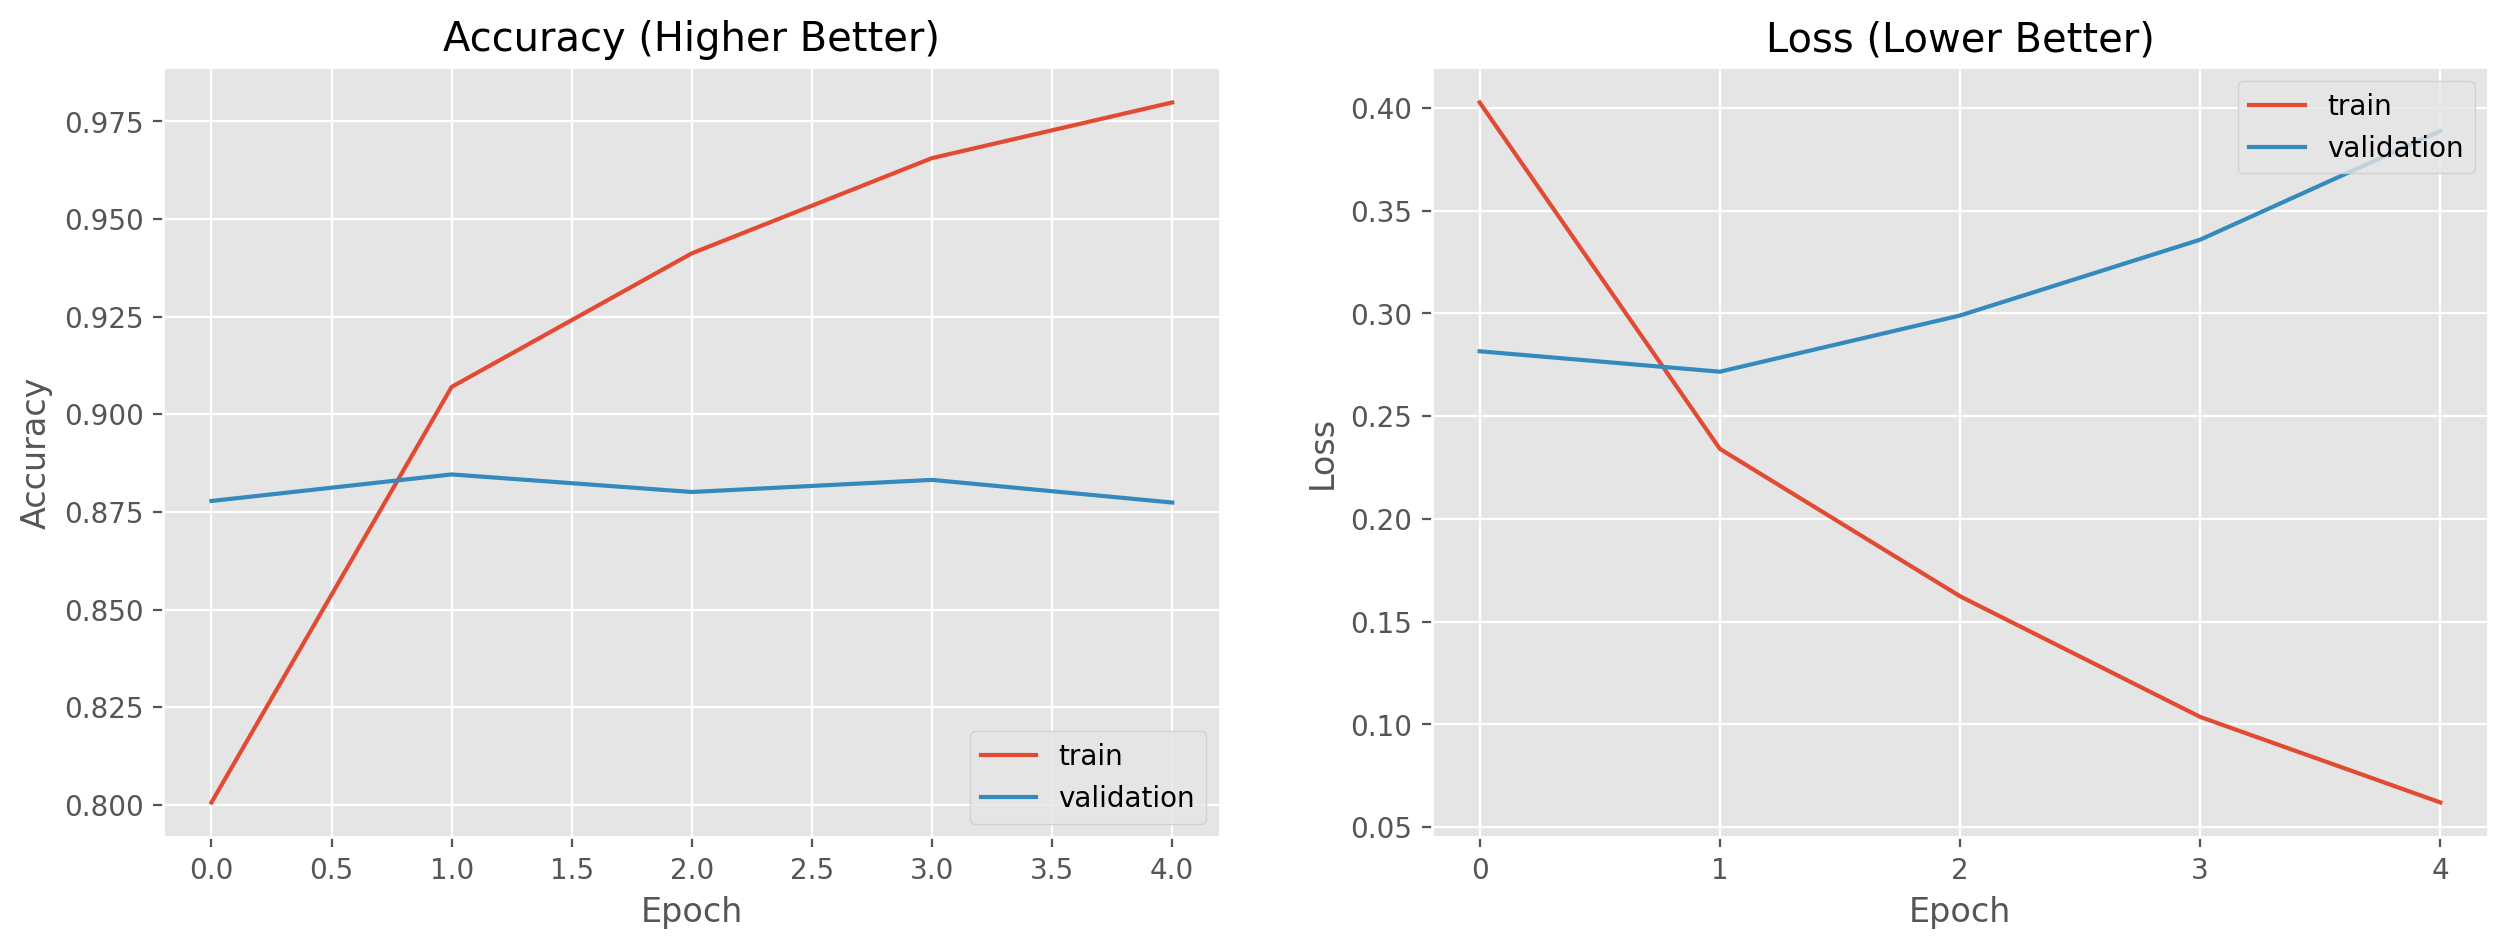

In [41]:
f, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))

ax1.plot(model_log.history['accuracy'])
ax1.plot(model_log.history['val_accuracy'])
ax1.set_title('Accuracy (Higher Better)')
ax1.set(xlabel='Epoch', ylabel='Accuracy')
ax1.legend(['train', 'validation'], loc='lower right')

ax2.plot(model_log.history['loss'])
ax2.plot(model_log.history['val_loss'])
ax2.set_title('Loss (Lower Better)')
ax2.set(xlabel='Epoch', ylabel='Loss')
ax2.legend(['train', 'validation'], loc='upper right')
ax2.xaxis.set_major_locator(MaxNLocator(integer=True))

In [42]:
model.save("IMDBCNNv4model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [43]:
score = model.evaluate(x_test, y_test_encoded, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.28153061866760254
Test accuracy: 0.8777999877929688


In [44]:
y_hat = model.predict(x_test)
y_hat1 = pd.DataFrame(data=y_hat)
y_hat1[0]=y_hat1[0].apply(lambda a:0 if a<=0.5 else 1)
y_hat2 = y_hat1[0]

313/313 [==============================] - 3s 9ms/step


In [45]:
print(confusion_matrix(y_test_encoded, y_hat2))
print(classification_report(y_test_encoded,y_hat2))

[[4347  614]
 [ 608 4431]]
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      4961
           1       0.88      0.88      0.88      5039

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

